In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import discord
comp_cols = ["Woodcutting EXP", "Fishing EXP", "Mining EXP", "Agility EXP", "Thieving EXP", "Slayer EXP",
                       "Farming EXP", "Runecrafting EXP", "Hunter EXP", "Abyssal Sire", 
                       "Alchemical Hydra", "Artio", "Barrows Chests", "Callisto", "Calvarion", "Cerberus", 
                       "Chambers of Xeric", "Chambers of Xeric: Challenge Mode", "Chaos Elemental", "Commander Zilyana", 
                       "Corporeal Beast", "Dagannoth Prime", "Dagannoth Rex", "Dagannoth Supreme",
                       "Duke Sucellus", "General Graardor", "Giant Mole", "Grotesque Guardians", 
                       "Kalphite Queen", "King Black Dragon", "Kraken", "Kree'Arra", "K'ril Tsutsaroth", 
                       "Nex", "Phosani's Nightmare",
                       "Phantom Muspah", "Sarachnis", "Scorpia", "Scurrius", "Spindel", "Tempoross", 
                       "The Corrupted Gauntlet", "The Leviathan","The Whisperer", "Theatre of Blood", 
                       "Theatre of Blood: Hard Mode", "Thermonuclear Smoke Devil", "Tombs of Amascut", "Tombs of Amascut: Expert Mode",
                       "TzKal-Zuk", "TzTok-Jad", "Vardorvis", "Venenatis", "Vet'ion", "Vorkath", "Wintertodt", "Zalcano", "Zulrah"]

# TODO:
- discord bot system
- player drafting system
- ~create dataframe for original stats/values~
- ~generate ehp dictionary~
- dataframes for different teams? column flagging team?
- function to grab new player values
- function to calculate the deltas
- function to calculate the ehp
- function to split all the values up by region
- function to keep competition score (find 1st, 2nd, 3rd for each region)
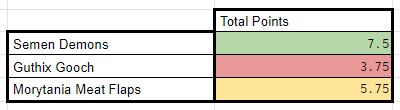
- function to keep region leaderboards
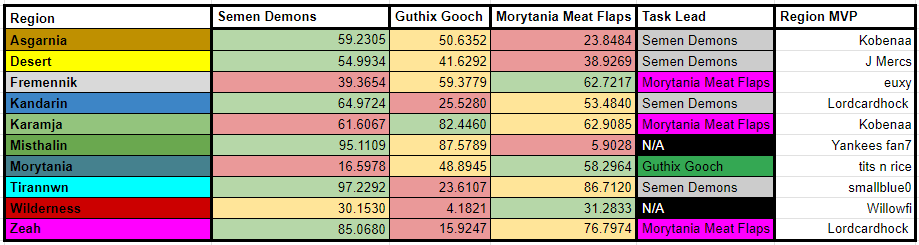
- function to plot total point pie chart
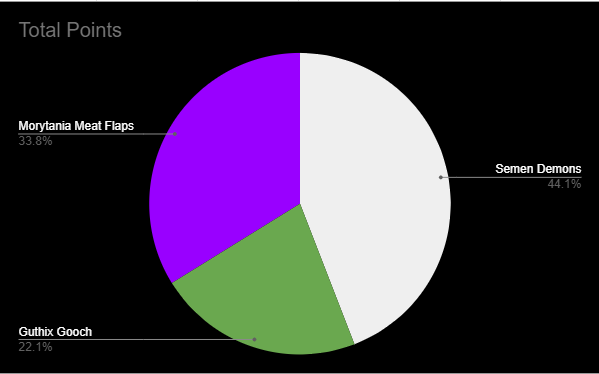
- function to plot region scoreboard
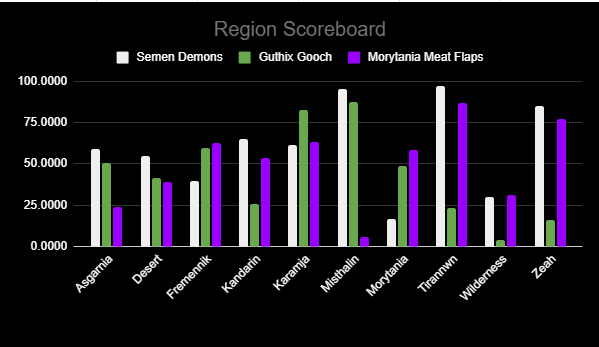
- function for MVP, individual rankings
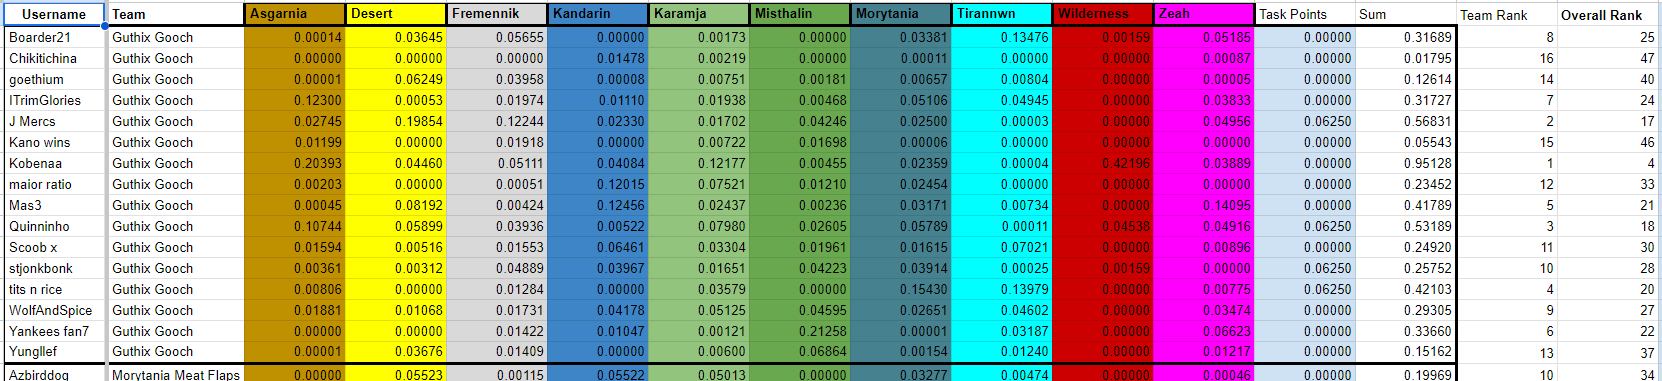

# starting with a test list of players

In [6]:
clan_members = pd.read_csv('C:/Users/Brandon Loesch/Desktop/Discord bot/clanmembers.csv',delimiter=',',header=None, names = ["RSN", "NA"])
clan_members = clan_members.drop(["NA"],axis=1)


name_list = []
for i in range(len(clan_members)):
    if clan_members.iat[i, 0] in ["MIND THE WAP", "Suitabl3", "The Maher"]:
        name_list.append(clan_members.iat[i,0])

## function to scrape individual hiscores

In [9]:
def get_hiscores_data(player_name):
    url = f"https://secure.runescape.com/m=hiscore_oldschool/index_lite.ws?player={player_name}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.content.decode("utf-8")
        lines = data.split("\n")
        hiscores_data = [line.split(",") for line in lines if line.strip()]
        columns = ["skill", "rank", "level"]
        df = pd.DataFrame(hiscores_data, columns=columns)
        df.set_index("skill", inplace=True)
        df = pd.DataFrame(df.stack()).T
        df.columns = df.columns.map("_".join)
        df.index = [player_name]
        df.columns = ["Total", "Total EXP", "Attack", "Attack EXP", "Defence", "Defence EXP", "Strength", "Strength EXP", "Hitpoints", "Hitpoints EXP", "Ranged", "Ranged EXP", "Prayer", "Prayer EXP", "Magic", "Magic EXP", "Cooking", "Cooking EXP", "Woodcutting", "Woodcutting EXP",
                  "Fletching", "Fletching EXP", "Fishing", "Fishing EXP", "Firemaking", "Firemaking EXP", "Crafting", "Crafting EXP", "Smithing", "Smithing EXP", "Mining", "Mining EXP", "Herblore", "Herblore EXP", "Agility", "Agility EXP", "Thieving", "Thieving EXP", "Slayer", "Slayer EXP",
                  "Farming", "Farming EXP", "Runecrafting", "Runecrafting EXP", "Hunter", "Hunter EXP", "Construction", "Construction EXP", "blank1", "League Points", "Bounter Hunter - Hunter", "Bountry Hunter - Rogue", "Bounter Hunter - Hunter (Legacy)", "Bountry Hunter - Rogue (Legacy)","Clue Scrolls (all)", "Clue Scrolls (beginner)", "Clue Scrolls (easy)", "Clue Scrolls (medium)",
                  "Clue Scrolls (hard)", "Clue Scrolls (elite)", "Clue Scrolls (master)", "LMS - Rank", "Soul Wars Zeal", "PVP Arena - Rank", "Guardians of the Rift - Rifts Closed", "Abyssal Sire", "Alchemical Hydra", "Artio", "Barrows Chests", "Bryophyta",
                  "Callisto", "Calvarion", "Cerberus", "Chambers of Xeric", "Chambers of Xeric: Challenge Mode", "Chaos Elemental", "Chaos Fanatic", "Commander Zilyana", "Corporeal Beast", "Crazy Archaeologist", "Dagannoth Prime", "Dagannoth Rex", "Dagannoth Supreme",
                  "Deranged Archaeologist", "Duke Sucellus","General Graardor", "Giant Mole", "Grotesque Guardians", "Hespori", "Kalphite Queen", "King Black Dragon", "Kraken", "Kree'Arra", "K'ril Tsutsaroth", "Mimic", "Nex", "Nightmare", "Phosani's Nightmare", "Obor",
                  "Phantom Muspah", "Sarachnis", "Scorpia", "Scurrius", "Skotizo", "Spindel", "Tempoross", "The Gauntlet", "The Corrupted Gauntlet", "The Leviathan","The Whisperer","Theatre of Blood", "Theatre of Blood: Hard Mode", "Thermonuclear Smoke Devil", "Tombs of Amascut", "Tombs of Amascut: Expert Mode",
                  "TzKal-Zuk", "TzTok-Jad", "Vardorvis", "Venenatis", "Vet'ion", "Vorkath", "Wintertodt", "Zalcano", "Zulrah"]
        return df
    else:
        print(f"Failed to retrieve hiscores data for {player_name}")
        return None

In [10]:
hiscores_df = pd.DataFrame()
for RSN in name_list:
    player_df = get_hiscores_data(RSN)
    if player_df is not None:
        hiscores_df = pd.concat([hiscores_df, player_df], axis=0)

In [ ]:
start_df = hiscores_df[["Woodcutting Exp", "Fishing Exp", "Mining Exp", "Agility Exp", "Thieving Exp", "Slayer Exp",
                       "Farming Exp", "Runecrafting Exp", "Hunter Exp", "Abyssal Sire", 
                       "Alchemical Hydra", "Artio", "Barrows Chests", "Callisto", "Calvarion", "Cerberus", 
                       "Chambers of Xeric", "Chambers of Xeric: Challenge Mode", "Chaos Elemental", "Commander Zilyana", 
                       "Corporeal Beast", "Dagannoth Prime", "Dagannoth Rex", "Dagannoth Supreme",
                       "Duke Sucellus", "General Graardor", "Giant Mole", "Grotesque Guardians", 
                       "Kalphite Queen", "King Black Dragon", "Kraken", "Kree'Arra", "K'ril Tsutsaroth", 
                       "Nex", "Phosani's Nightmare",
                       "Phantom Muspah", "Sarachnis", "Scorpia", "Scurrius", "Spindel", "Tempoross", 
                       "The Corrupted Gauntlet", "The Leviathan","The Whisperer", "Theatre of Blood", 
                       "Theatre of Blood: Hard Mode", "Thermonuclear Smoke Devil", "Tombs of Amascut", "Tombs of Amascut: Expert Mode",
                       "TzKal-Zuk", "TzTok-Jad", "Vardorvis", "Venenatis", "Vet'ion", "Vorkath", "Wintertodt", "Zalcano", "Zulrah"]].astype(int).replace(-1, 0)

In [65]:
start_df

,Woodcutting Exp,Fishing Exp,Mining Exp,Agility Exp,Thieving Exp,Slayer Exp,Farming Exp,Runecrafting Exp,Hunter Exp,Abyssal Sire,...,Tombs of Amascut: EM,TzKal-Zuk,TzTok-Jad,Vardorvis,Venenatis,Vet'ion,Vorkath,Wintertodt,Zalcano,Zulrah
Euxy,16921844,17085590,17906254,16159790,20399740,25180393,27981100,15415658,17992552,1077,...,246,12,36,2440,318,212,2259,585,255,3701
MIND THE WAP,1018066,1775985,1309090,1013084,737790,682479,1139415,370835,865657,0,...,0,0,0,0,0,0,0,56,0,0
Suitabl3,5914439,6357552,4246653,7147858,10368817,15533474,16904967,3812181,5529046,472,...,178,2,7,1322,177,264,283,282,163,701
The Maher,16459270,9974982,13040942,14012057,18359652,9679859,14119160,13034951,8722321,235,...,75,1,10,0,190,248,347,288,1441,43


In [184]:
def generate_ehp(df):
    EHP_dict = {}
    for category in comp_cols:
        EHP_dict[category] = float(input(f"{category} EHP?"))
    return(EHP_dict)

In [185]:
EHP_dict = generate_ehp(start_df)

KeyboardInterrupt: Interrupted by user

In [102]:
update_ehp_df = pd.DataFrame(0, columns = start_df.columns, index = start_df.index)
for cat in start_df.columns:
    v = start_df[cat].values.tolist()
    v_ehp = [x / EHP_dict[cat] for x in v]
    update_ehp_df[cat] = v_ehp

In [81]:
update_ehp_df

NameError: name 'update_ehp_df' is not defined

In [50]:
start_df = pd.read_csv("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/Start.csv").set_index("Username")
update_df = pd.read_csv("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/Update.csv").set_index("Username")

In [51]:
ehp_df = pd.read_csv("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/EHP.csv").set_index("Category")

In [52]:
old_cols = start_df.columns.to_list()

In [53]:
#filling in original dataframes with missing columns
cols_to_add = ["Artio", "Calvarion", "Duke Sucellus", "Scurrius", "Spindel", "The Leviathan", "The Whisperer", "Vardorvis"]
for col in cols_to_add:
    if col not in start_df:
        start_df[col] = 0
        update_df[col] = 0

In [54]:
#convert everything to integer, replace -1 with 0
start_df = start_df[comp_cols].astype(float).replace(-1, 0)
update_df = update_df[comp_cols].astype(float).replace(-1, 0)
ehp_df = ehp_df.astype(float)

In [55]:
start_df.to_pickle("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/Start.pkl")
update_df.to_pickle("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/Update.pkl")

In [56]:
ehp_df.to_pickle("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/EHP.pkl")

In [57]:
delta_df = update_df - start_df

In [58]:
team1 = ["CmmandoSpork",
"Dezerthuntar",
"wha who",
"Blazeuchija",
"bowfabundy",
"OJdaInnocent",
"Lordcardhock ",
"Jack Da Rips",
"Doc Beeb",
"ImMaxy",
"Odd_mobile",
"Jaamies97",
"Iron My Cat",
"smallblue0",
"cwob",
"Jubnon"]

team2 = ["Mas3",
"Kobenaa",
"tits n rice",
"ITrimGlories",
"Yungllef",
"Quinninho",
"stjonkbonk",
"WolfAndSpice",
"Scoob x",
"maior ratio",
"J Mercs",
"Kano wins",
"Yankees fan7",
"Boarder21",
"goethium",
"Chikitichina"]

team3 = ["The Maher",
"Dusted Yuna",
"The 0racle",
"Bommerche",
"euxy",
"MrsWllw",
"Willowfi",
"Suitabl3",
"Im Folly",
"Plssmissile",
"Azbirddog",
"Sonfish",
"wimen",
"Key Concept",
"not2fly",
"Dr snuggles0"]

In [59]:
for name in start_df.index:
    if name in team1:
        delta_df.at[name, "Team"] = 1
    elif name in team2:
        delta_df.at[name, "Team"] = 2
    else:
        delta_df.at[name, "Team"] = 3

In [60]:
df_1 = delta_df[delta_df["Team"] == 1]
df_2 = delta_df[delta_df["Team"] == 2]
df_3 = delta_df[delta_df["Team"] == 3]

Setting up region leaderboard

In [13]:
region_dict = {"Tirannwn": ["Woodcutting EXP", "Zulrah", "Zalcano", "The Corrupted Gauntlet"],
              "Fremennik": ["Mining EXP", "Vorkath", "Phantom Muspah", "Dagannoth Prime", "Dagannoth Rex", "Dagannoth Supreme", "Duke Sucellus"],
              "Kandarin": ["Fishing EXP", "Kraken", "Cerberus", "Thermonuclear Smoke Devil"],
              "Morytania": ["Agility EXP", "Barrows Chests", "Grotesque Guardians", "Phosani's Nightmare", "Theatre of Blood", "Theatre of Blood: Hard Mode"],
              "Karamja": ["Slayer EXP", "TzKal-Zuk", "TzTok-Jad"],
              "Wilderness": ["Callisto", "Calvarion", "Corporeal Beast", "Scorpia", "Venenatis", "Vet'ion", "King Black Dragon", "Artio", "Spindel", "Chaos Elemental"],
              "Zeah": ["Farming EXP", "Alchemical Hydra", "Chambers of Xeric", "Chambers of Xeric: Challenge Mode", "Sarachnis", "Wintertodt", "Vardorvis"],
              "Desert": ["Thieving EXP", "Kalphite Queen", "Tombs of Amascut", "Tombs of Amascut: Expert Mode", "Tempoross"],
              "Misthalin": ["Runecrafting EXP", "Abyssal Sire", "Giant Mole", "Scurrius", "The Whisperer", "The Leviathan"],
               "Asgarnia": ["Hunter EXP", "Kree'Arra", "General Graardor", "K'ril Tsutsaroth", "Nex", "Commander Zilyana"]}

In [138]:
region_leaderboard = pd.DataFrame(0, columns = ["Team1", "Team2", "Team3"], index = region_dict.keys())

In [139]:
region_leaderboard

,Team1,Team2,Team3
Tirannwn,0,0,0
Fremennik,0,0,0
Kandarin,0,0,0
Morytania,0,0,0
Karamja,0,0,0
Wilderness,0,0,0
Zeah,0,0,0
Desert,0,0,0
Misthalin,0,0,0
Asgarnia,0,0,0


In [16]:
df_list = [df_1,df_2,df_3]

## Load in previous comp data for testing

In [61]:
start_df = pd.read_pickle("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/Start.pkl")
update_df = pd.read_pickle("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/Update.pkl")

delta_df = update_df - start_df

ehp_df = pd.read_pickle("C:/Users/Brandon Loesch/Desktop/King_of_the_Trails/EHP.pkl")

# function for calculating overall region ehp based on delta dataframe

In [90]:
def calc_region_ehp(df):
    # Takes a teams' delta dataframe and returns a dictionary:
    # Keys are the region and values are the total ehp in that region
    region_ehp_dict = {}
    
    for region in region_dict:
        #only use columns that belong to each region
        temp_df = df[region_dict[region]]
        region_ehp = 0
        #iterate through columns (represent categories), calc category ehp and sum to region ehp
        for cat in temp_df.columns:           
            cat_ehp = sum(temp_df[cat] / ehp_df.at[cat, "EHP Rate"])
            region_ehp += cat_ehp
        
        region_ehp_dict[region] = region_ehp
    
    return(region_ehp_dict)

In [140]:
for i, df in enumerate(df_list):
    region_ehp = calc_region_ehp(df)
    region_leaderboard.iloc[:,i] = region_ehp.values()

In [141]:
region_leaderboard

,Team1,Team2,Team3
Tirannwn,81.756162,22.387644,70.870929
Fremennik,38.205373,58.782773,61.521688
Kandarin,64.477947,25.352488,52.361756
Morytania,16.279192,28.121215,53.203738
Karamja,61.606733,80.445967,62.908450
Wilderness,24.535714,2.757976,27.786905
Zeah,76.695398,15.924691,71.130121
Desert,44.210019,29.162566,27.566296
Misthalin,61.444275,53.380993,5.891653
Asgarnia,59.230494,48.959231,20.833609


# generate overall score based on above region_leaderboard

In [193]:
overall_score = pd.DataFrame(0, columns=["Team1", "Team2", "Team3"], index = ["Score"])

In [194]:
for i in range(region_leaderboard.shape[0]):
    max_team = region_leaderboard.iloc[i,:].idxmax()
    min_team = region_leaderboard.iloc[i,:].idxmin()
    
    team_set = set(region_leaderboard.columns.tolist())
    mid_team = (team_set - {max_team}) - {min_team}
    
    mid_team = mid_team.pop() if mid_team else None
    
    overall_score[max_team] += 1
    overall_score[mid_team] += 0.5

In [195]:
overall_score

,Team1,Team2,Team3
Score,6.5,3.5,5.0


# generate region mvps